In [1]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt

###############################
# example from ipython cook book 
###############################


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280215 entries, 2020-03-20 18:38:46.316904151+00:00 to 2020-04-19 18:38:36.895164980+00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Pressure_bar  280215 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


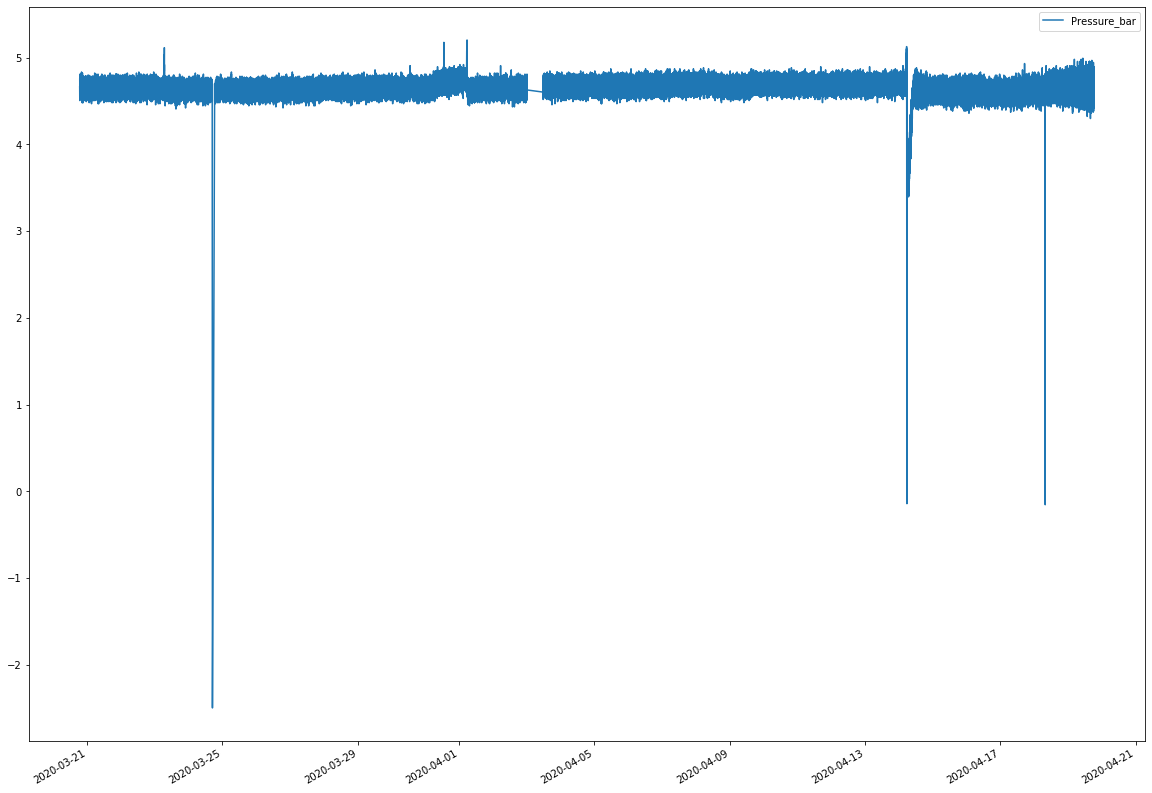

In [3]:
pressure_inlet_ultra_filtration_30days = pd.read_pickle("pressure_inlet_ultra_filtration_30days.pickle")
pressure_inlet_ultra_filtration_30days.plot(figsize=(20, 15))

pressure_inlet_ultra_filtration_30days.info()


In [4]:

# 6.  We now compute the Fourier transform and the spectral density of the signal. 
# The first step is to compute the FFT of the signal using the fft() function:


temp_fft = sp.fftpack.fft(pressure_inlet_ultra_filtration_30days["Pressure_bar"].values)




In [6]:

# 7.  Once the FFT has been obtained, we need to take the square of its absolute value in order to get the power spectral density (PSD):

temp_psd = np.abs(temp_fft) ** 2

In [16]:
# 8.  The next step is to get the frequencies corresponding to the values of the PSD. The fftfreq() utility function does just that. 
# It takes the length of the PSD vector as input as well as the frequency unit.
# Here, we choose an annual unit: a frequency of 1 corresponds to 1 year (365 days). We provide 1/365 because the original unit is in days:

fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1 / 30)


In [17]:
# 9.  The fftfreq() function returns positive and negative frequencies. 
# We are only interested in positive frequencies here, as we have a real signal:

i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

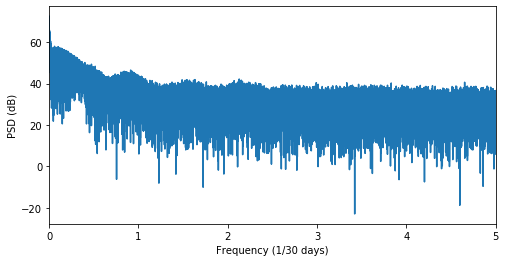

In [18]:
#10.  We now plot the power spectral density of our signal, as a function of the frequency (in unit of 1/year).
# We choose a logarithmic scale for the y axis (decibels):


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/30 days)')
ax.set_ylabel('PSD (dB)')